In [7]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('insurance.csv')

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
df.shape

(1338, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [32]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [33]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [34]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='age', ylabel='count'>

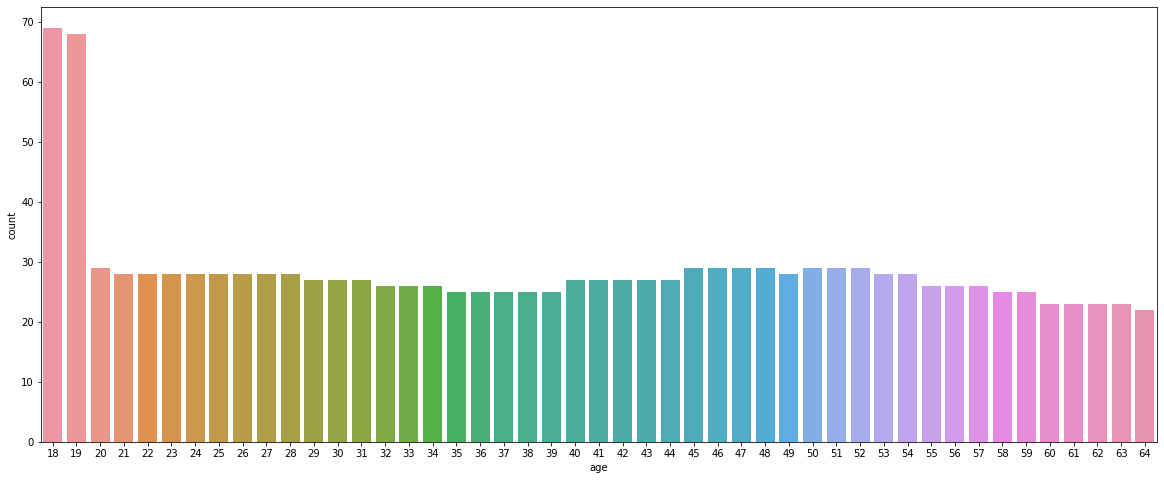

In [102]:
plt.figure(figsize=(20,8))
sns.countplot('age',data=df)

In [103]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

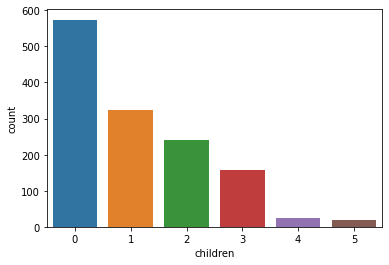

In [104]:
sns.countplot('children',data=df);

In [105]:
df['smoker'].value_counts()

1    1064
0     274
Name: smoker, dtype: int64

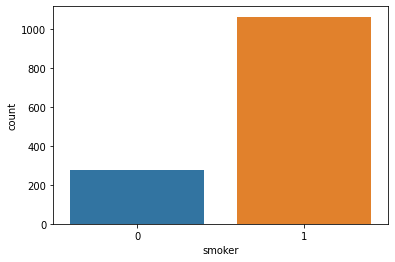

In [106]:
sns.countplot('smoker',data=df);

In [107]:
df['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

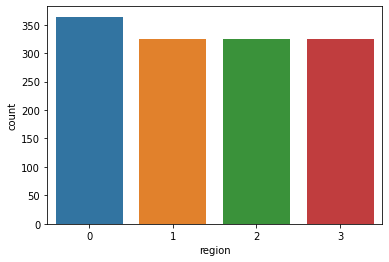

In [111]:
sns.countplot('region',data=df);

<AxesSubplot:xlabel='sex', ylabel='bmi'>

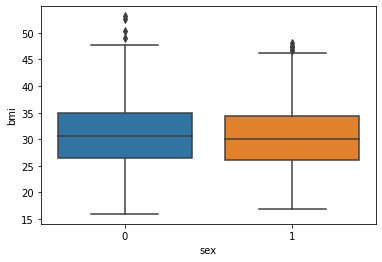

In [114]:
sns.boxplot(df['sex'],df['bmi'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

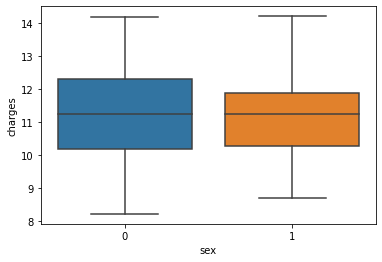

In [115]:
sns.boxplot(df['sex'],df['charges'])

In [109]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,12.121121
1,18,0,33.770,1,1,0,8.805045
2,28,0,33.000,3,1,0,10.142157
3,33,0,22.705,0,1,3,12.526567
4,32,0,28.880,0,1,3,9.940531


In [45]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
obs_table = pd.crosstab(df['sex'],df['smoker'])
obs_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [48]:
import scipy.stats as st
import pylab

In [49]:
chi_val, p_val, ddof, exp_table = st.chi2_contingency(obs_table)

In [50]:
alpha=0.05
if p_val<alpha:
    print("reject nul hypo")
else:
    print("fail to reject")

reject nul hypo


# it means there is no relationship between sex and smoker

In [51]:
obs_table1 = pd.crosstab(df['smoker'],df['region'])
obs_table1

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [52]:
chi_val1, p_val1, ddof1, exp_table1 = st.chi2_contingency(obs_table1)

In [53]:
alpha=0.05
if p_val1<alpha:
    print("reject nul hypo")
else:
    print("fail to reject")

fail to reject


# there is relationship between smoker and region

In [54]:
df.groupby('region')['smoker'].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

In [56]:
df.corr(method='spearman')

,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000


# Feature Engineering

In [57]:
df['sex'] = df['sex'].map({'male':0,'female':1})

In [58]:
df['smoker'] = df['smoker'].map({'yes':0,'no':1})

In [59]:
df['region'] = df['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3}) 

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [61]:
import scipy.stats as st
import pylab

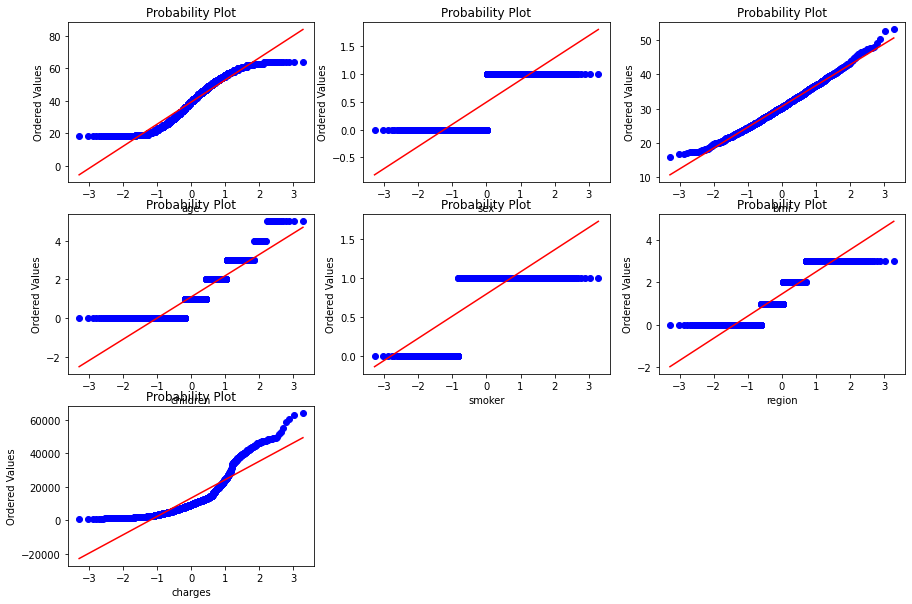

In [62]:
plt.figure(figsize=(15,10));
plot = 1
for i in df.columns:
    plt.subplot(3,3,plot);
    st.probplot(df[i],dist='norm',plot=pylab);
    plt.xlabel(i)
    plot +=1

In [63]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.048975
charges     1.515880
dtype: float64

In [64]:
df.kurtosis()

age        -1.245088
sex        -2.002557
bmi        -0.050732
children    0.202454
smoker      0.145756
region     -1.387388
charges     1.606299
dtype: float64

In [65]:
x = st.yeojohnson(df['charges'])
x = x[0]
x = pd.Series(x)


In [66]:
print(x.skew())
print(x.kurtosis())

-0.008708879288063982
-0.6504036533708604


In [67]:
df['charges']=x

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,12.121121
1,18,0,33.770,1,1,0,8.805045
2,28,0,33.000,3,1,0,10.142157
3,33,0,22.705,0,1,3,12.526567
4,32,0,28.880,0,1,3,9.940531


In [69]:
x = df.drop(columns='charges')
y = df['charges']

# Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x = scaler.fit_transform(x)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [77]:
print(x_train.shape)
print(x_test.shape)

(1070, 6)
(268, 6)


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred = lr.predict(x_test)
y_pred[:20]

array([11.27699115, 11.019641  , 13.89979599, 11.88130402, 11.01204644,
       10.09286448,  9.4558677 , 11.81852519, 11.02727632, 10.61961334,
       10.52974389, 11.41280645, 10.88407488, 10.06233432, 12.29927047,
       11.42420128, 11.53180453, 10.06180869, 10.79770118, 11.93401582])

In [87]:
y_test[:20].values

array([11.28837   , 11.09656587, 13.67551501, 11.71818959, 11.27601145,
       10.1585454 ,  9.14150169, 11.53106142, 10.91052014, 10.42907971,
       10.74891083, 11.40210551, 10.87100162, 10.05400326, 12.2451659 ,
       11.43157989, 11.66766601,  9.79421898, 10.68337696, 13.18225971])

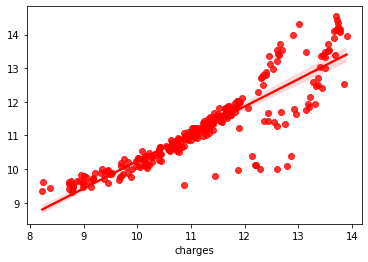

In [110]:
sns.regplot(y_test,y_pred,color='r');

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [93]:
r2_score(y_test,y_pred)

0.7911404955856294

In [94]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.3914000120732375

In [96]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.034709804936019675

In [98]:
mse = mean_squared_error(y_test,y_pred)
mse

0.388196201473617

In [100]:
rmse = np.sqrt(mse)
rmse

0.6230539314325984